In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [3]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [5]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [7]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
print(train_data.describe())

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.

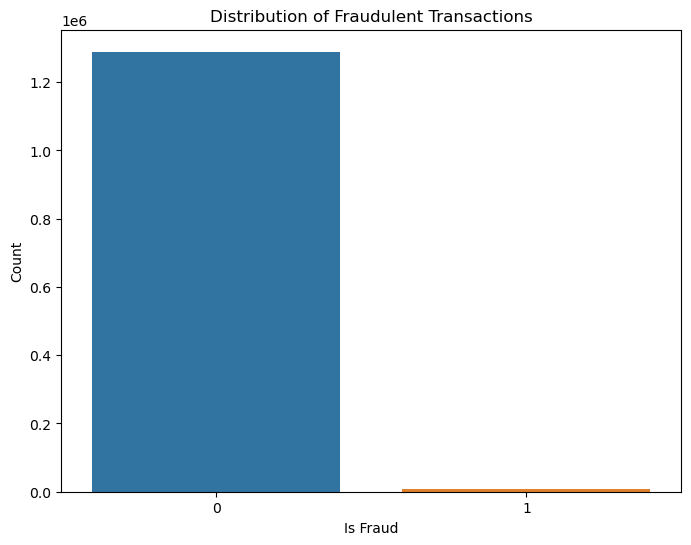

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

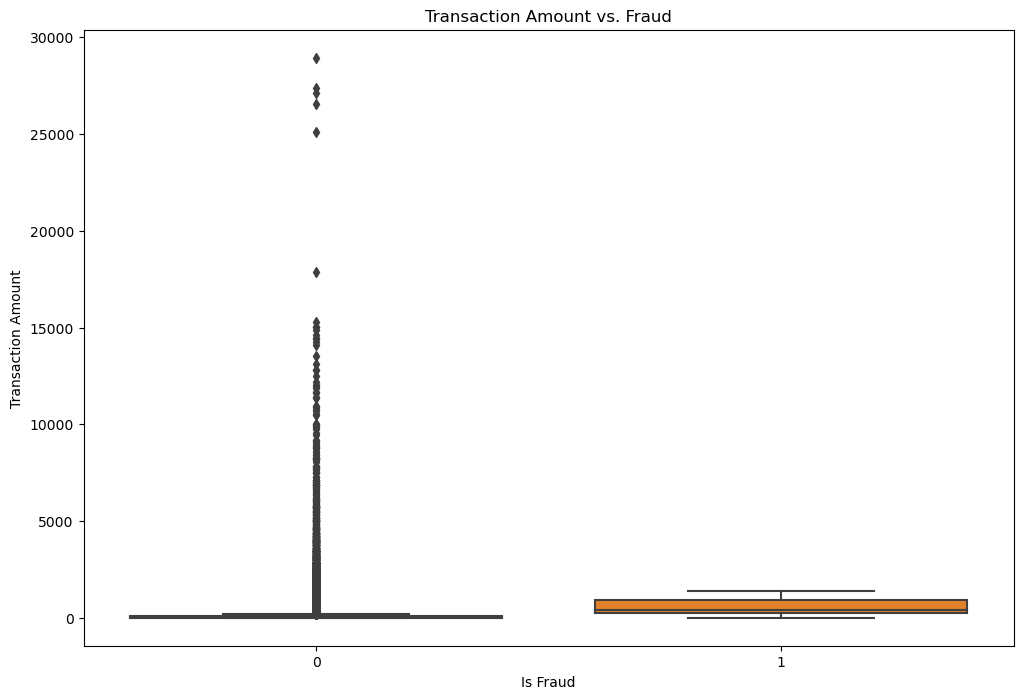

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_data)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

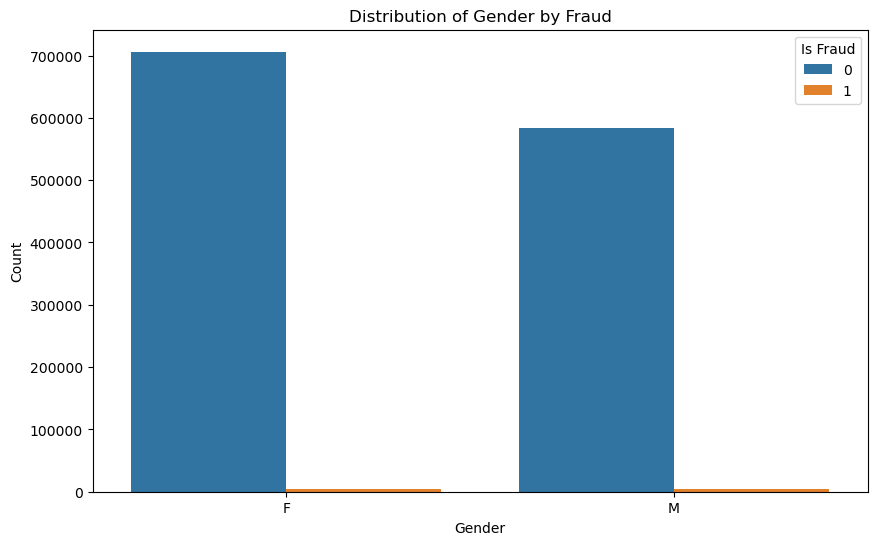

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_data)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

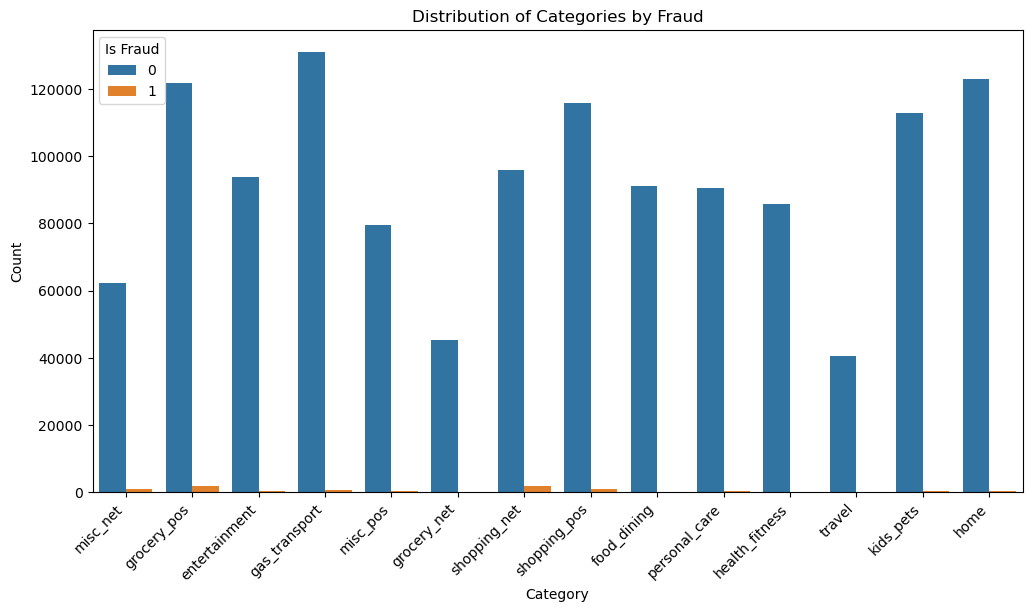

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_data)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()


In [13]:
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['trans_day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek

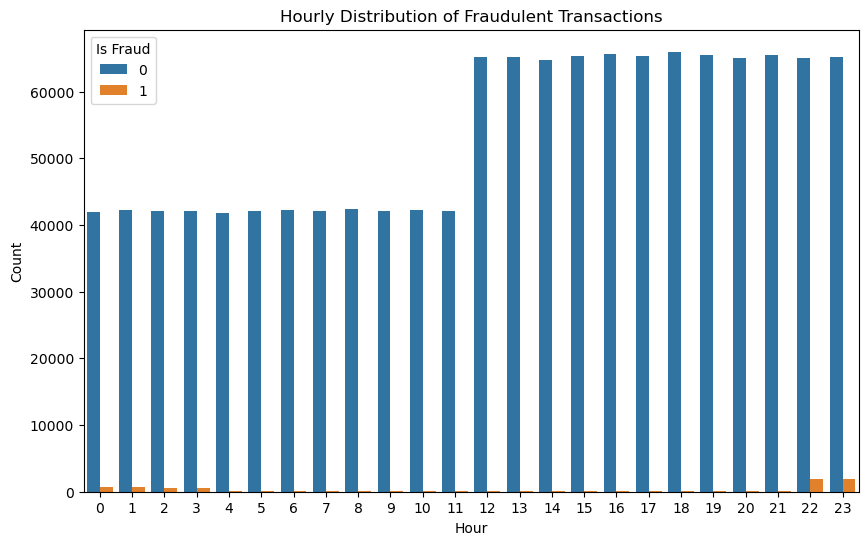

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_data)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

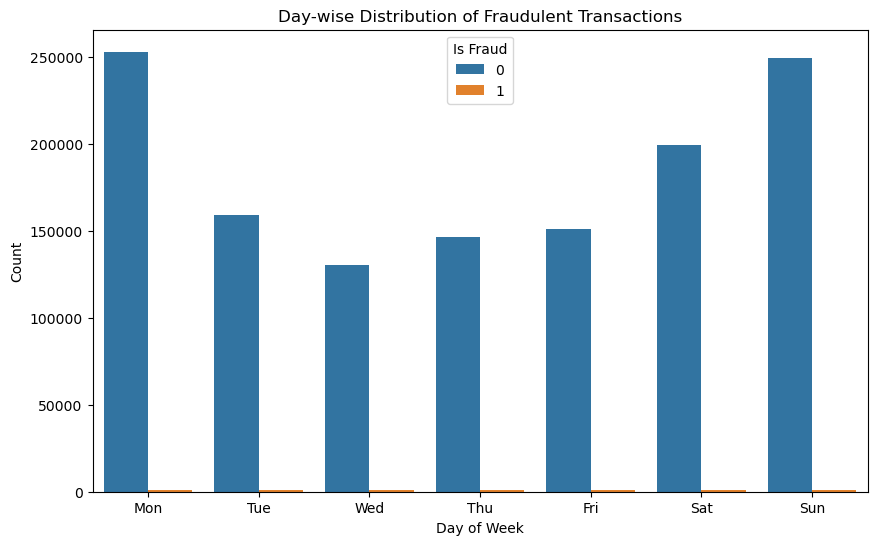

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_day', hue='is_fraud', data=train_data)
plt.title('Day-wise Distribution of Fraudulent Transactions')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Is Fraud')
plt.show()

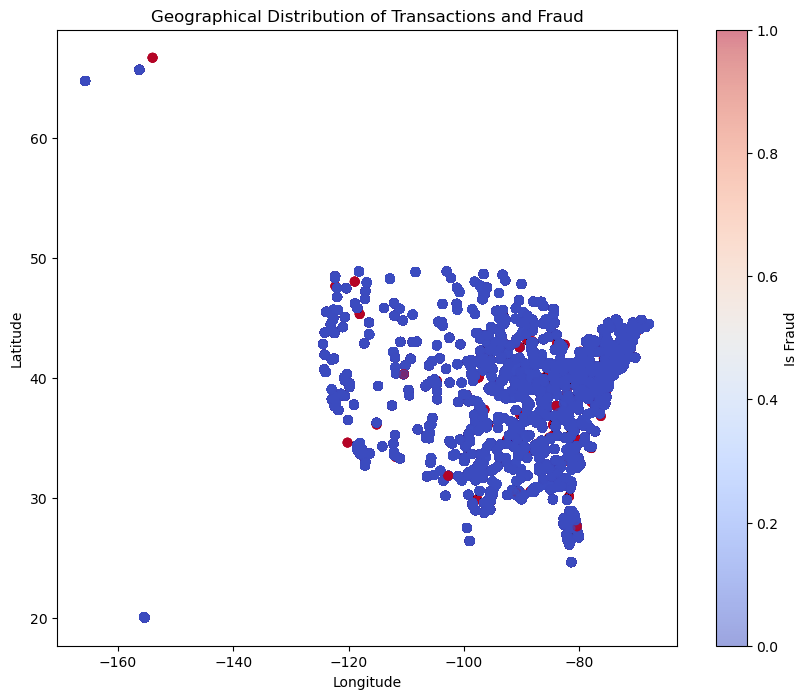

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data['long'], train_data['lat'], c=train_data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

<Figure size 1000x600 with 0 Axes>

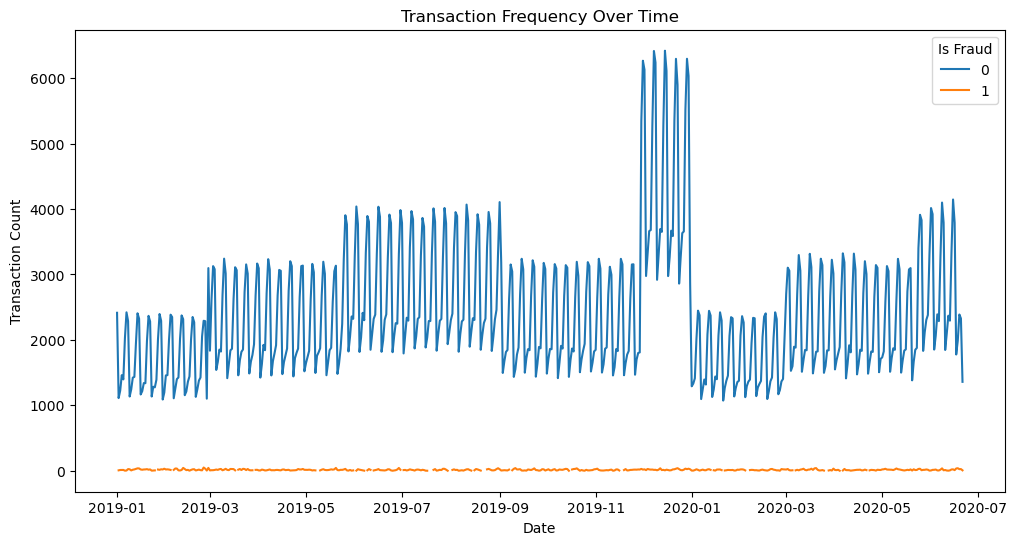

In [17]:
plt.figure(figsize=(10, 6))
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['trans_date'] = train_data['trans_date_trans_time'].dt.date
transaction_counts = train_data.groupby(['trans_date', 'is_fraud']).size().unstack()
transaction_counts.plot(kind='line', figsize=(12, 6))
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

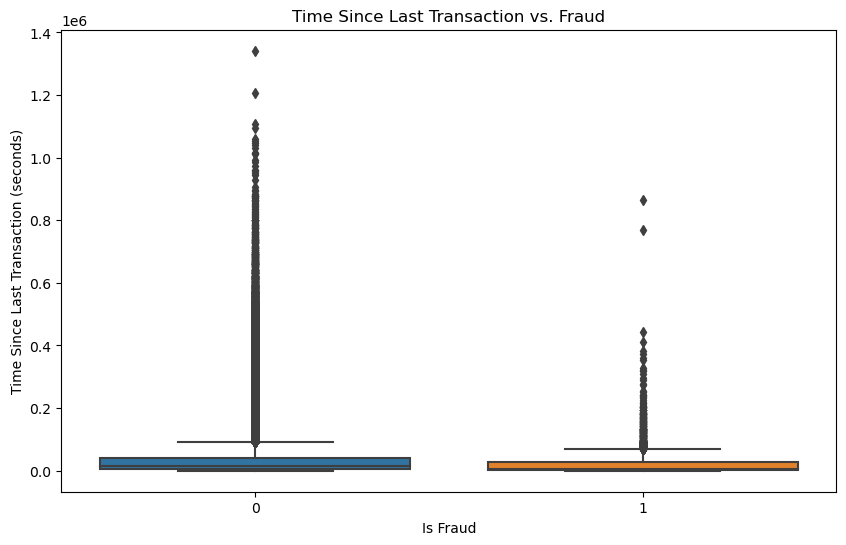

In [18]:
train_data['time_since_last_transaction'] = train_data.groupby('cc_num')['unix_time'].diff()
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='time_since_last_transaction', data=train_data)
plt.title('Time Since Last Transaction vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Time Since Last Transaction (seconds)')
plt.show()

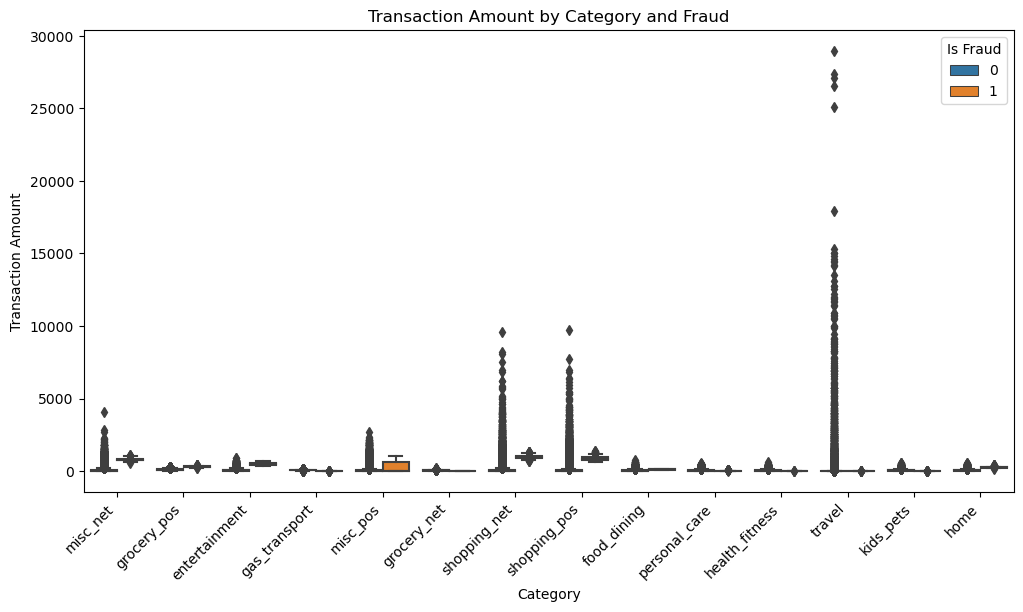

In [19]:
# Transaction Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', hue='is_fraud', data=train_data)
plt.title('Transaction Amount by Category and Fraud')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

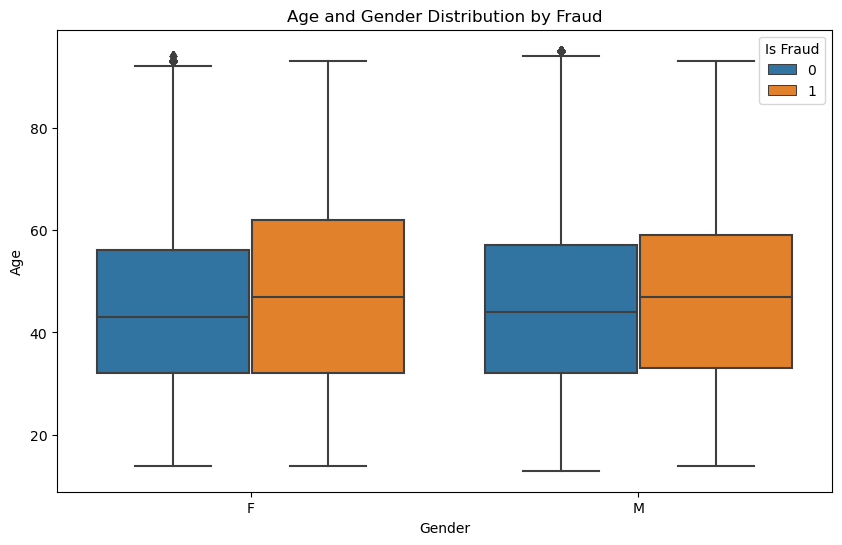

In [20]:
train_data['dob'] = pd.to_datetime(train_data['dob'])
train_data['age'] = (train_data['trans_date_trans_time'] - train_data['dob']).dt.days // 365
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=train_data)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

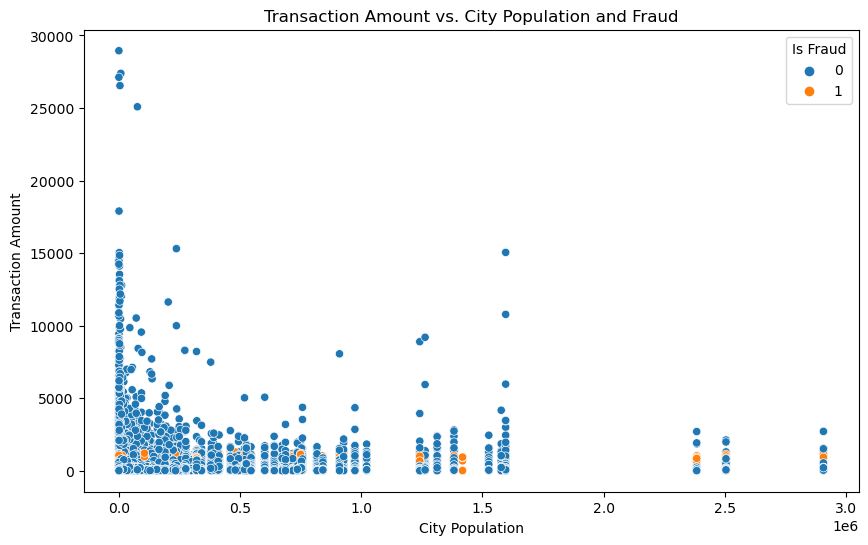

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=train_data)
plt.title('Transaction Amount vs. City Population and Fraud')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

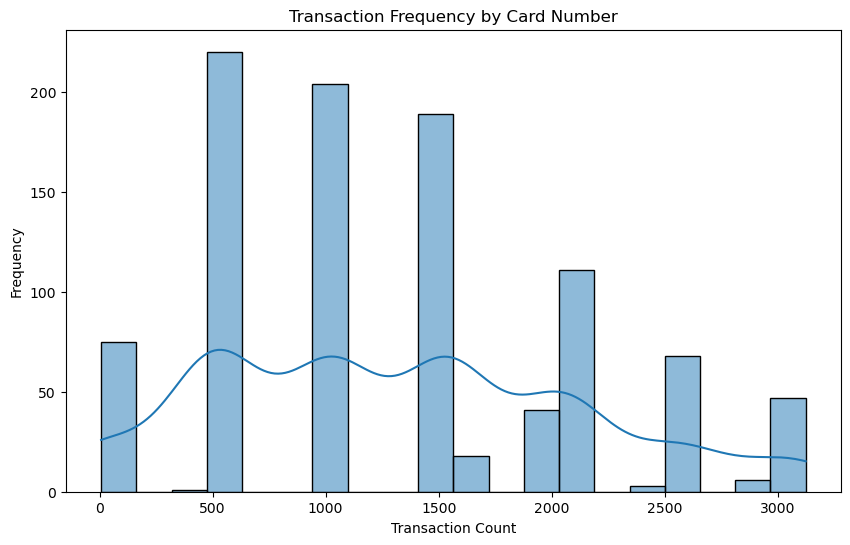

In [22]:
card_transaction_counts = train_data['cc_num'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(card_transaction_counts, bins=20, kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

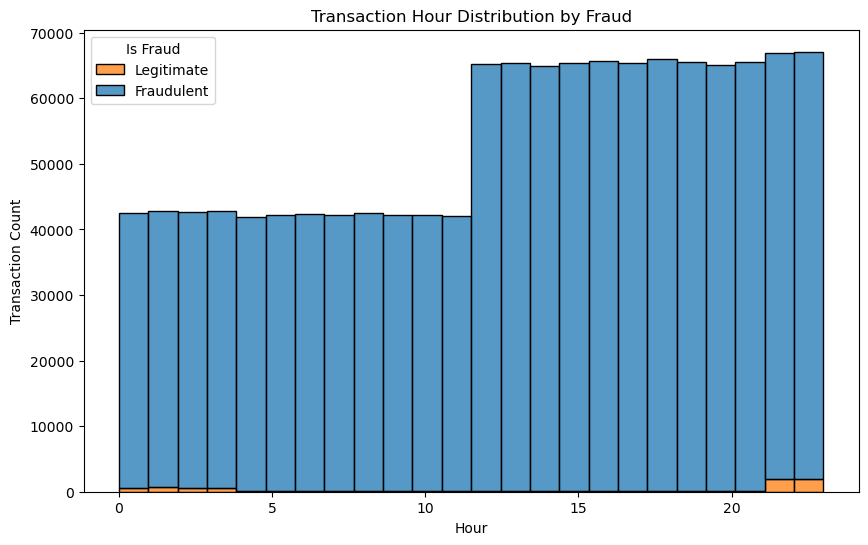

In [23]:
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [25]:
encoder = OneHotEncoder(drop='first')
categorical_cols = ['gender', 'category', 'state']
encoded_train_features = encoder.fit_transform(train_data[categorical_cols]).toarray()
encoded_test_features = encoder.transform(test_data[categorical_cols]).toarray()

scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
scaled_train_features = scaler.fit_transform(train_data[numerical_cols])
scaled_test_features = scaler.transform(test_data[numerical_cols])

final_train_features = pd.concat([pd.DataFrame(encoded_train_features), pd.DataFrame(scaled_train_features)], axis=1)
final_test_features = pd.concat([pd.DataFrame(encoded_test_features), pd.DataFrame(scaled_test_features)], axis=1)

train_target = train_data['is_fraud']
test_target = test_data['is_fraud']

In [26]:
smote = SMOTE(random_state=36)

x_train_resample, y_train_resample = smote.fit_resample(final_train_features, train_target)

In [27]:
print('Current length of the training set: ', len(y_train_resample))

Current length of the training set:  2578338


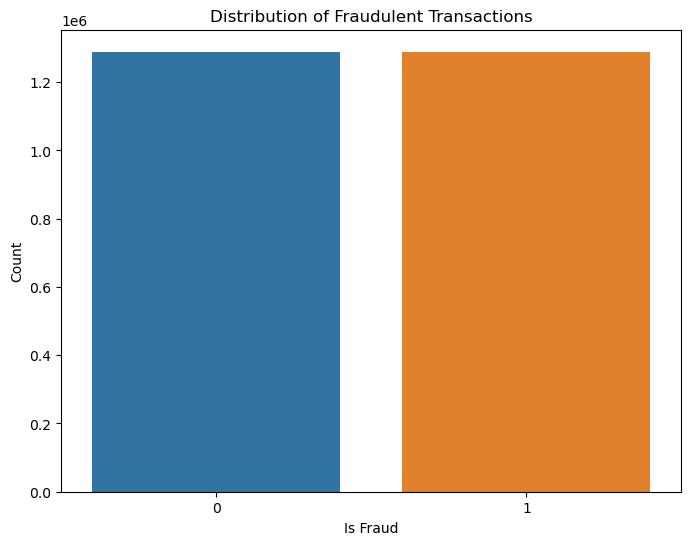

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resample)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [29]:
X_shuffled, y_shuffled = shuffle(x_train_resample, y_train_resample, random_state=42)

In [30]:
x_train, x_validation, y_train, y_validation = train_test_split(X_shuffled, y_shuffled, test_size=0.5)

In [31]:
x_train_copy = x_train
y_train_copy = y_train

x_train = x_train[:10000]
y_train = y_train[:10000]

In [32]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
lg_predictions = lg_model.predict(x_validation)
lg_accuracy = accuracy_score(y_validation, lg_predictions)
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

C:\Users\sanum\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 81.491%


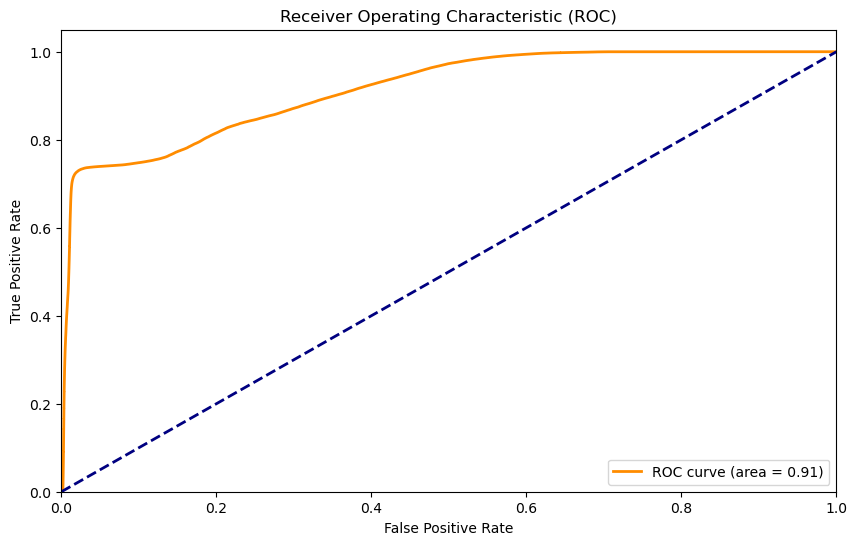

In [33]:
probs = lg_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

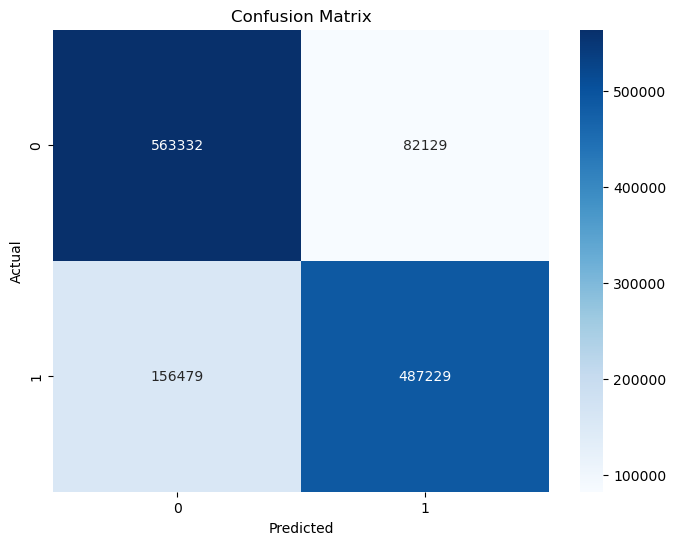

In [34]:
conf_matrix = confusion_matrix(y_validation, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:

from sklearn.svm import SVC
svm_model = SVC(kernel='poly')
svm_model.fit(x_train, y_train)
svm_predictions = svm_model.predict(x_validation)
svm_accuracy = accuracy_score(y_validation, svm_predictions)
print("SVM Accuracy: {:.3f}%".format(svm_accuracy * 100))

SVM Accuracy: 85.894%


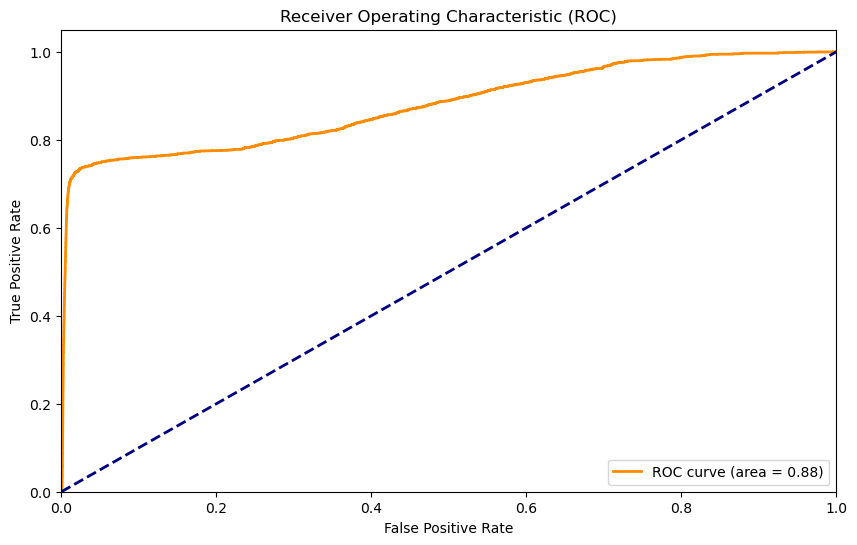

In [36]:

decision_scores = svm_model.decision_function(final_test_features)
fpr, tpr, thresholds = roc_curve(test_target, decision_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

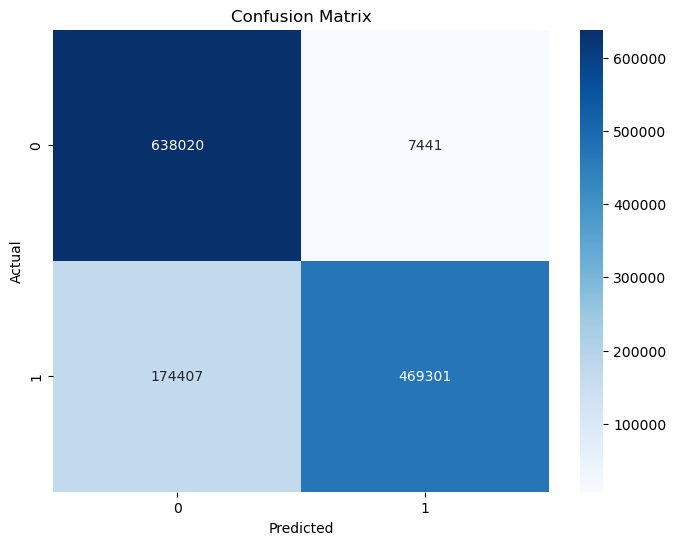

In [37]:
conf_matrix = confusion_matrix(y_validation, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Train KNN model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
# Make predictions on test data
knn_predictions = knn_model.predict(x_validation)

# Calculate evaluation metrics on test data
knn_accuracy = accuracy_score(y_validation, knn_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("KNN Accuracy: {:.3f}%".format(knn_accuracy * 100))

KNN Accuracy: 87.726%


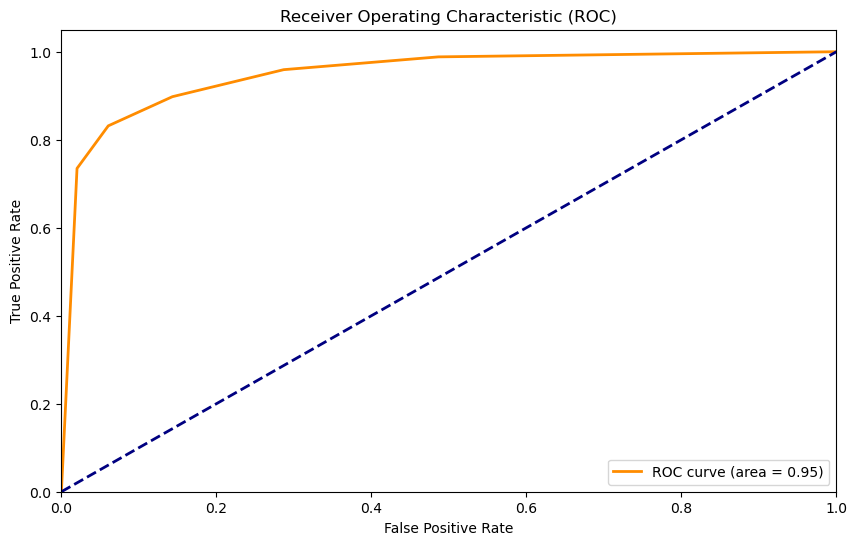

In [58]:
# Calculate ROC curve and AUC
probs = knn_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


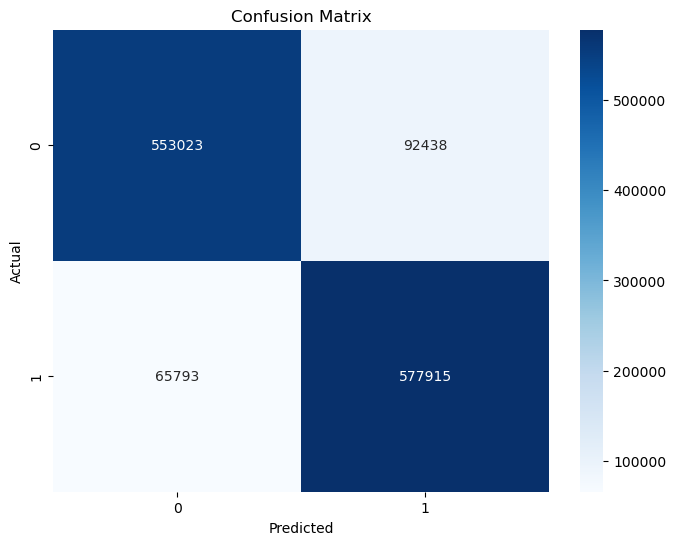

In [59]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
# Make predictions on test data
rf_predictions = rf_model.predict(x_validation)

# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_validation, rf_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))


Random Forest Accuracy: 97.646%


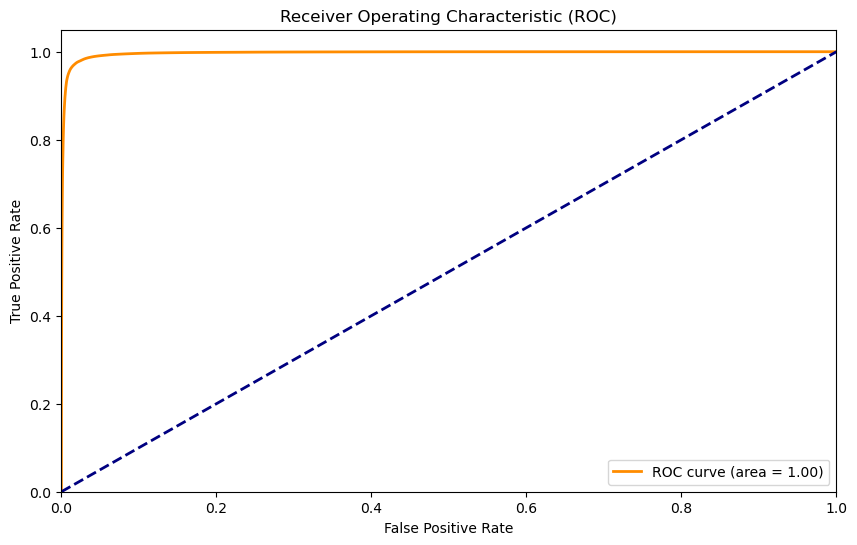

In [61]:
# Calculate ROC curve and AUC
probs = rf_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

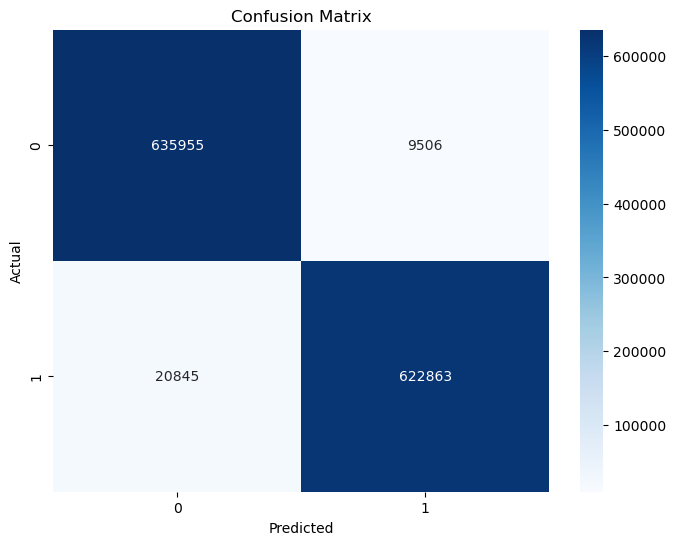

In [62]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(x_train, y_train)

# Make predictions on test data
mlp_predictions = mlp_model.predict(x_validation)

# Calculate evaluation metrics on test data
mlp_accuracy = accuracy_score(y_validation, mlp_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("MLP Accuracy: {:.3f}%".format(mlp_accuracy * 100))

MLP Accuracy: 95.572%


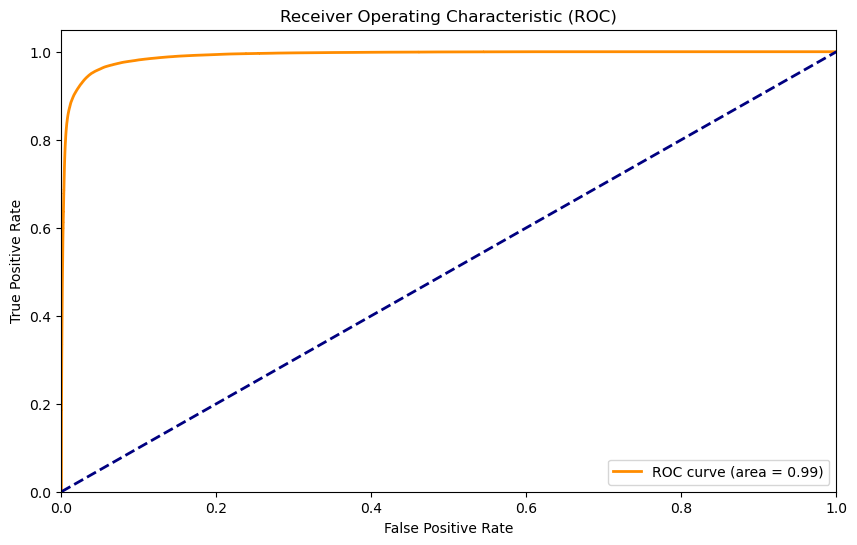

In [64]:
# Calculate ROC curve and AUC
probs = mlp_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


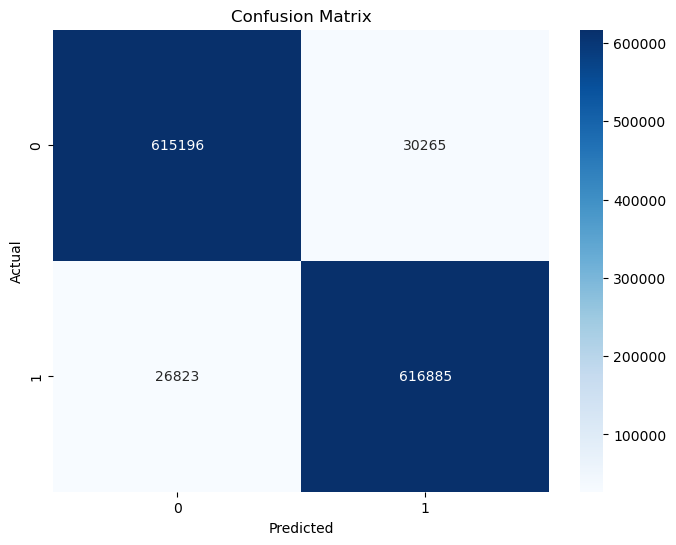

In [65]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, mlp_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [66]:
from sklearn.linear_model import SGDClassifier

# Train SGD model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(x_train, y_train)
# Make predictions on test data
sgd_predictions = sgd_model.predict(x_validation)

# Calculate evaluation metrics on test data
sgd_accuracy = accuracy_score(y_validation, sgd_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("SGD Accuracy: {:.3f}%".format(sgd_accuracy * 100))


SGD Accuracy: 85.715%


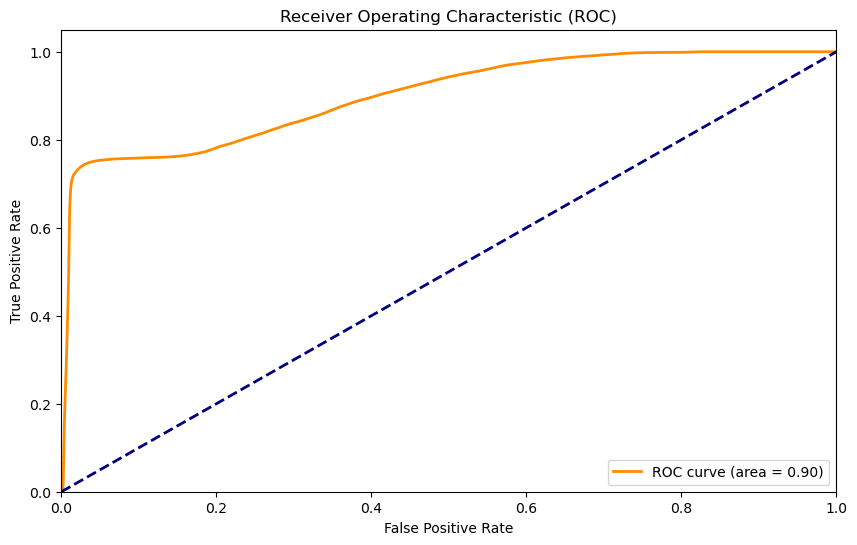

In [67]:
decision_scores = sgd_model.decision_function(x_validation)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_validation, decision_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


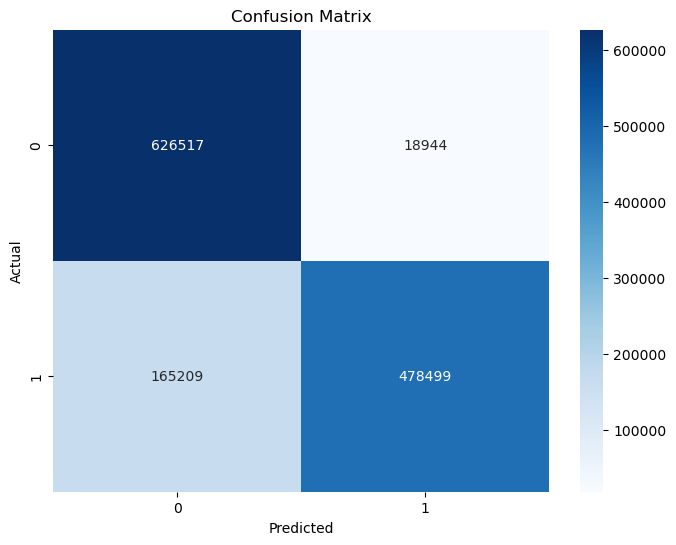

In [68]:
conf_matrix = confusion_matrix(y_validation, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(x_train, y_train)

# Make predictions on test data
ext_predictions = extra_trees_model.predict(x_validation)

# Calculate evaluation metrics on test data
ext_accuracy = accuracy_score(y_validation, ext_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Extra Tree Accuracy: {:.3f}%".format(ext_accuracy * 100))

Extra Tree Accuracy: 97.058%


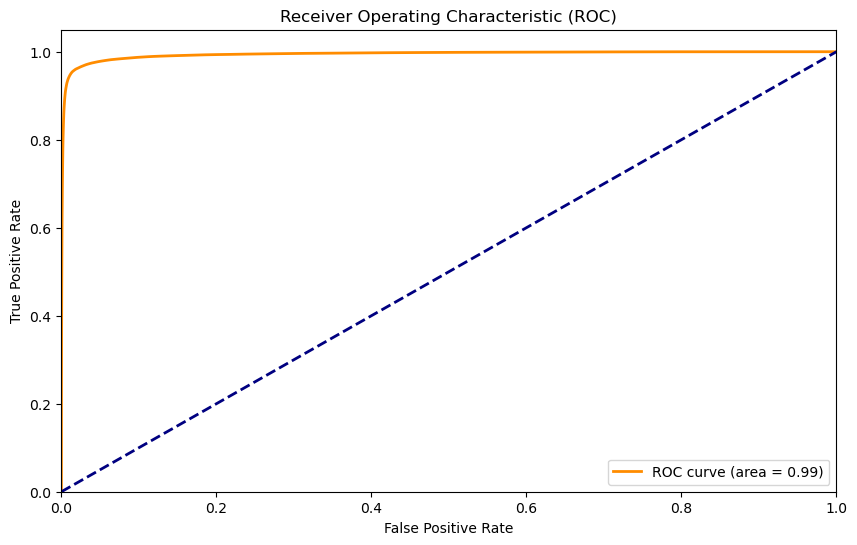

In [70]:
# Calculate ROC curve and AUC
probs = extra_trees_model.predict_proba(x_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

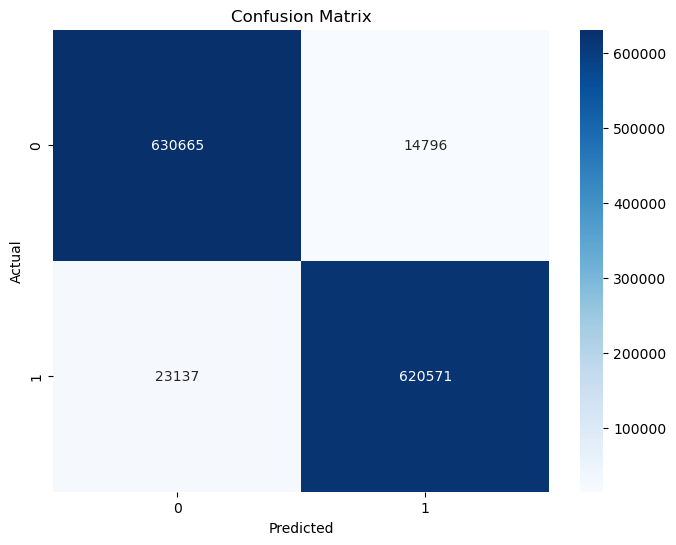

In [71]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, ext_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
import pandas as pd
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Define model names and instances
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'MLP', 'SGD', 'Extra Trees']
model_instances = [lg_model, svm_model, knn_model, rf_model, mlp_model, sgd_model, extra_trees_model]

# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for model in model_instances:
    predictions = model.predict(final_test_features)
    accuracy = accuracy_score(test_target, predictions)
    roc_score = roc_auc_score(test_target, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(test_target, predictions))
    precision_scores.append(precision_score(test_target, predictions))
    recall_scores.append(recall_score(test_target, predictions))

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})
print(results_df)

                 Model  Accuracy  ROC Score  F1 Score  Precision Score  \
0  Logistic Regression  0.907426   0.816305  0.056972         0.029652   
1                  SVM  0.976535   0.854012  0.193768         0.111697   
2                  KNN  0.836223   0.805179  0.035194         0.018006   
3        Random Forest  0.984989   0.913751  0.302158         0.184117   
4                  MLP  0.937234   0.891871  0.094261         0.049911   
5                  SGD  0.972009   0.847793  0.166175         0.093882   
6          Extra Trees  0.979205   0.894129  0.230831         0.134638   

   Recall Score  
0      0.724476  
1      0.730536  
2      0.773893  
3      0.841958  
4      0.846154  
5      0.722611  
6      0.808392  
